# Donchian Channel

The Donchian channel is an indicator used in market trading developed by Richard Donchian. It is formed by taking the highest high and the lowest low of the last n periods. The area between the high and the low is the channel for the period chosen. See [Donchian channel - Wikipedia](https://en.wikipedia.org/wiki/Donchian_channel). 

In [1]:
%matplotlib inline

from typing import List, Tuple

import backtrader as bt
import pandas as pd
from matplotlib import pyplot as plt

## Read Data

In [2]:
BAR_SIZE = 3600000 # 1H time bar
TIME_BAR_DIR = f'/data/bars/TimeBar/{BAR_SIZE}'

In [3]:
from utils import read_bars as read_bars_tmp

def read_bars(csv_file: str)->pd.DataFrame:
    TIME_BEGIN = pd.to_datetime('2020-07-01T00:00:00.000Z')
    TIME_END = pd.to_datetime('2020-07-30T00:00:00.000Z')
    bars_df = read_bars_tmp(csv_file)
    bars_df = bars_df[(bars_df['timestamp'] >= TIME_BEGIN) & (bars_df['timestamp'] < TIME_END)]
    return bars_df

In [4]:
time_bars = read_bars(f'/data/bars/TimeBar/{BAR_SIZE}/TimeBar.{BAR_SIZE}.Binance.Swap.BTC_USDT.csv')

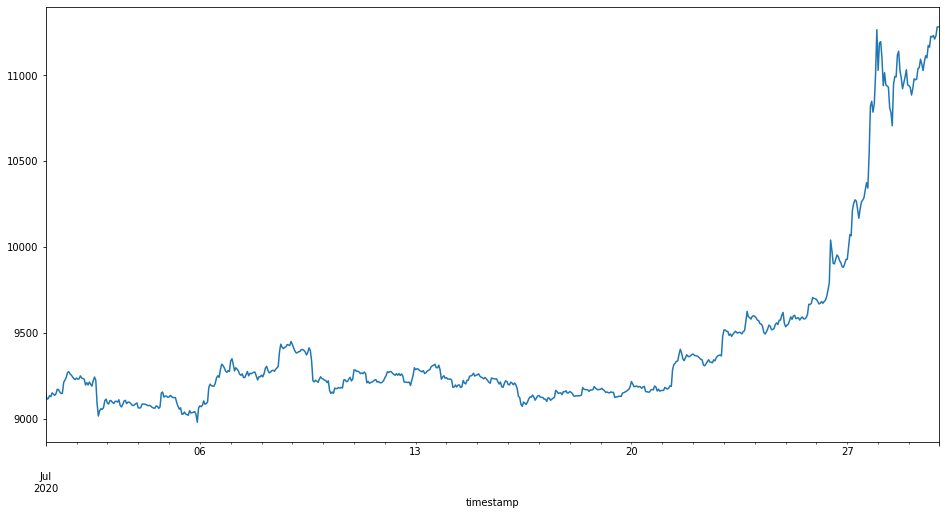

In [5]:
time_bars['vwap'].plot(figsize=(16, 8))

In [6]:
from utils import CryptoPandasData

data_feed = CryptoPandasData(dataname=time_bars, timeframe=bt.TimeFrame.Minutes)

## Donchian Channel

In [7]:
class DonchianChannelsIndicator(bt.Indicator):
    '''Donchian channel.'''

    alias = ('DCH', 'DonchianChannel',)

    lines = ('dcm', 'dch', 'dcl',)  # dc middle, dc high, dc low

    params = (
        ('period', 20), # lookback period
    )

    plotinfo = dict(subplot=False)  # plot along with data
    plotlines = dict(
        dcm=dict(ls='--'),  # dashed line
        dch=dict(_samecolor=True),  # use same color as prev line (dcm)
        dcl=dict(_samecolor=True),  # use same color as prev line (dch)
    )

    def __init__(self):
        hi, lo = self.data.high(-1), self.data.low(-1) # start from previous bar, current bar not considered
        self.l.dch = bt.indicators.Highest(hi, period=self.p.period)
        self.l.dcl = bt.indicators.Lowest(lo, period=self.p.period)
        self.l.dcm = (self.l.dch + self.l.dcl) / 2.0  # avg of the above

## Demo

In [8]:
class DummyStrategy(bt.Strategy):
    def __init__(self):
        self.dc = DonchianChannelsIndicator()

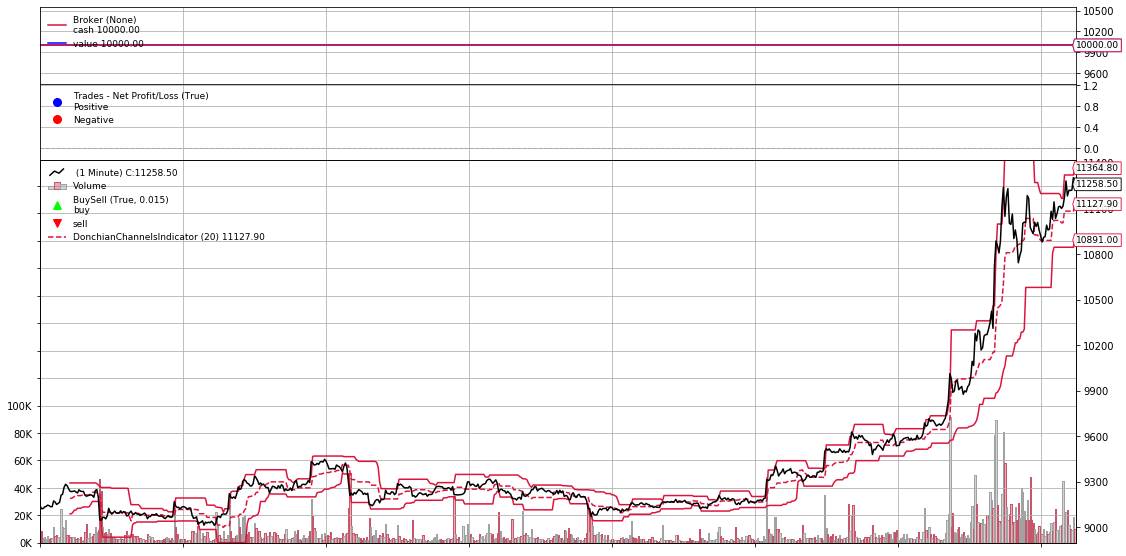

[[<Figure size 1152x576 with 4 Axes>]]

In [9]:
cerebro = bt.Cerebro()
cerebro.addstrategy(DummyStrategy)
cerebro.adddata(data_feed)
cerebro.run()

plt.rcParams['figure.figsize'] = (16, 8)
cerebro.plot(iplot=False)

## References

* [Donchian channel - Wikipedia](https://en.wikipedia.org/wiki/Donchian_channel)
* [Donchian Channels - Backtrader](https://www.backtrader.com/recipes/indicators/donchian/donchian/)
* [Cross-Backtesting Pitfalls - Backtrader](https://www.backtrader.com/blog/posts/2019-09-04-donchian-across-platforms/donchian-across-platforms/)